In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

13.822375536060733 69.39692731755818
0.4147705028687483 165.66413624626995
43.509548020735735 131.53351466980774
-83.25350942918962 142.43844034256136
60.31315249057053 -108.25427724032849
-63.94260678222422 -149.06453143330123
-49.92133476831629 -18.411212303925197
-12.373384459592032 95.71580537193677
56.89513265914948 148.37584775681148
55.06279964714312 25.96333660450776
59.755279375594824 63.32755556696131
23.02193066519517 179.11224888931145
42.14012972189633 -162.64130751575766
-78.19520424057258 -150.45445159132734
-27.173517465817653 -105.10592837830754
50.15413619991483 -27.96487797502803
-79.4407609519402 56.043595535845526
-29.870225029094797 -99.00883539004931
47.49089597469799 -56.7489774479082
-16.88284489485423 -153.94798497897727
37.10474906593059 -148.24064605105926
-63.5747689681896 147.36010851584962
-77.87346915668127 18.123233824996873
66.15335221898917 163.2050226824437
4.497766660756739 50.8243679503295
40.76587313183819 88.97129122388128
9.813853186456527 -136.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kavaratti
Processing Record 2 of Set 1 | bairiki
Processing Record 3 of Set 1 | barabash
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | la ronge
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | arman
Processing Record 10 of Set 1 | svencioneliai
Processing Record 11 of Set 1 | gari
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | lagoa
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | miquelon
Processing Record 19 of Set 1 | vaitape
Processing Record 20 of Set 1 | kahului
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 | hobyo
Processing Record 24 of Set 1 | korla
Processing Record 25 of Set 1 | at

Processing Record 43 of Set 4 | massaguet
Processing Record 44 of Set 4 | itaituba
Processing Record 45 of Set 4 | nguiu
City not found. Skipping...
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | canico
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | monterey
Processing Record 1 of Set 5 | entre rios
Processing Record 2 of Set 5 | susanville
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | kailua
Processing Record 5 of Set 5 | vicksburg
Processing Record 6 of Set 5 | balakhninskiy
Processing Record 7 of Set 5 | harlingen
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | adrar
Processing Record 10 of Set 5 | addi ugri
City not found. Skipping...
Processing Record 11 of Set 5 | cidreira
Processing Record 12 of Set 5 | souillac
Processing Record 13 of Set 5 | obsharovka
Processing Record 14 of Set 5 | marovoay
Processing Recor

Processing Record 30 of Set 8 | pathein
Processing Record 31 of Set 8 | saint-francois
Processing Record 32 of Set 8 | oussouye
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | sinkat
City not found. Skipping...
Processing Record 36 of Set 8 | bam
Processing Record 37 of Set 8 | arecibo
Processing Record 38 of Set 8 | mangan
Processing Record 39 of Set 8 | neiafu
Processing Record 40 of Set 8 | kenora
Processing Record 41 of Set 8 | padang
Processing Record 42 of Set 8 | aloleng
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | la romana
Processing Record 45 of Set 8 | severo-kurilsk
Processing Record 46 of Set 8 | senneterre
Processing Record 47 of Set 8 | herat
Processing Record 48 of Set 8 | esqueda
Processing Record 49 of Set 8 | tura
Processing Record 50 of Set 8 | husavik
Processing Record 1 of Set 9 | turayf
Processing Record 2 of Set 9 | golfito
Processing Record 3 of Set 9 | luderitz
Processi

Processing Record 12 of Set 12 | victor harbor
Processing Record 13 of Set 12 | tshikapa
Processing Record 14 of Set 12 | palmer
Processing Record 15 of Set 12 | port keats
Processing Record 16 of Set 12 | simbahan
Processing Record 17 of Set 12 | ambon
Processing Record 18 of Set 12 | mormugao
Processing Record 19 of Set 12 | buariki
City not found. Skipping...
Processing Record 20 of Set 12 | horconcitos
Processing Record 21 of Set 12 | ban tak
Processing Record 22 of Set 12 | khatanga
Processing Record 23 of Set 12 | camacha
Processing Record 24 of Set 12 | russell
Processing Record 25 of Set 12 | emirdag
Processing Record 26 of Set 12 | bull savanna
Processing Record 27 of Set 12 | honiara
Processing Record 28 of Set 12 | vardo
Processing Record 29 of Set 12 | mukhanovo
City not found. Skipping...
Processing Record 30 of Set 12 | utiroa
City not found. Skipping...
Processing Record 31 of Set 12 | mazamari
Processing Record 32 of Set 12 | rocha
Processing Record 33 of Set 12 | sawak

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.5669,72.6420,82.76,61,28,10.40,IN,2022-10-25 16:28:40
1,Bairiki,1.3292,172.9752,78.80,89,75,4.61,KI,2022-10-25 16:28:41
2,Barabash,43.2000,131.4833,38.84,77,3,3.22,RU,2022-10-25 16:28:41
3,Hobart,-42.8794,147.3294,55.26,96,100,16.11,AU,2022-10-25 16:24:22
4,La Ronge,55.1001,-105.2842,30.45,69,100,3.44,CA,2022-10-25 16:28:42
5,Mataura,-46.1927,168.8643,39.31,91,100,2.46,NZ,2022-10-25 16:28:42
6,Arraial Do Cabo,-22.9661,-42.0278,80.56,73,40,14.97,BR,2022-10-25 16:28:42
7,Bengkulu,-3.8004,102.2655,75.16,92,100,7.65,ID,2022-10-25 16:28:43
8,Arman,59.7000,150.1667,25.02,93,100,3.80,RU,2022-10-25 16:28:43
9,Svencioneliai,55.1667,26.0000,50.99,98,100,4.27,LT,2022-10-25 16:28:43


In [13]:
newcolumnorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[newcolumnorder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2022-10-25 16:28:40,10.5669,72.6420,82.76,61,28,10.40
1,Bairiki,KI,2022-10-25 16:28:41,1.3292,172.9752,78.80,89,75,4.61
2,Barabash,RU,2022-10-25 16:28:41,43.2000,131.4833,38.84,77,3,3.22
3,Hobart,AU,2022-10-25 16:24:22,-42.8794,147.3294,55.26,96,100,16.11
4,La Ronge,CA,2022-10-25 16:28:42,55.1001,-105.2842,30.45,69,100,3.44
5,Mataura,NZ,2022-10-25 16:28:42,-46.1927,168.8643,39.31,91,100,2.46
6,Arraial Do Cabo,BR,2022-10-25 16:28:42,-22.9661,-42.0278,80.56,73,40,14.97
7,Bengkulu,ID,2022-10-25 16:28:43,-3.8004,102.2655,75.16,92,100,7.65
8,Arman,RU,2022-10-25 16:28:43,59.7000,150.1667,25.02,93,100,3.80
9,Svencioneliai,LT,2022-10-25 16:28:43,55.1667,26.0000,50.99,98,100,4.27


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

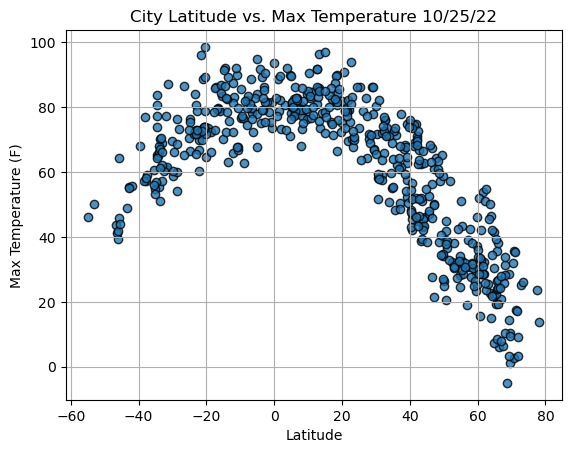

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

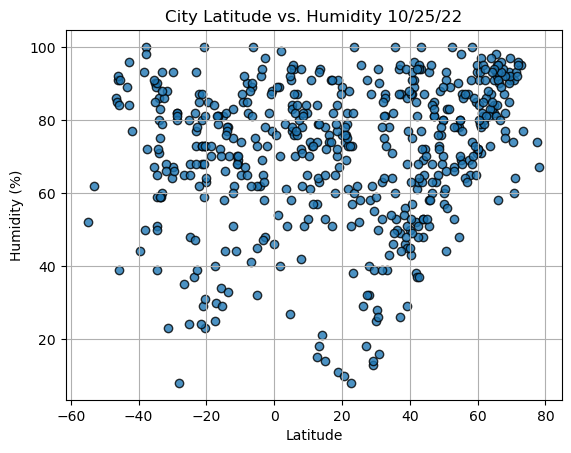

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

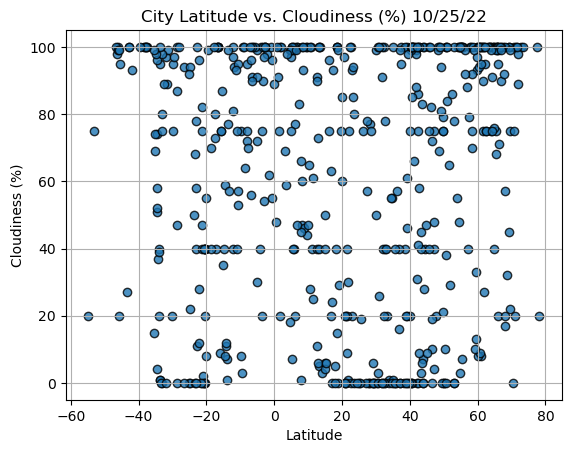

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

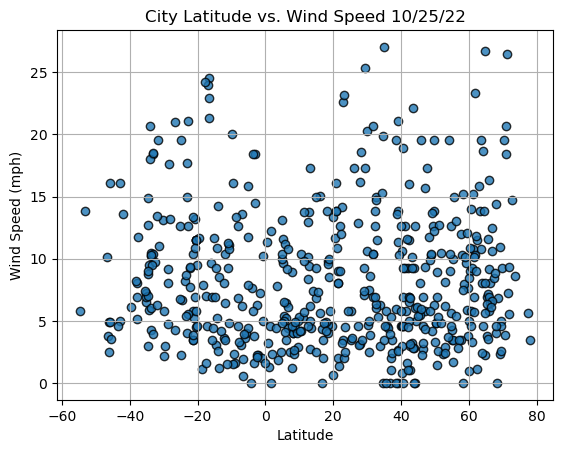

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2022-10-25 16:28:45
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    72.81
Humidity                       77
Cloudiness                     58
Wind Speed                  17.69
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
533    False
534     True
535     True
536     True
537    False
Name: Lat, Length: 538, dtype: bool

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

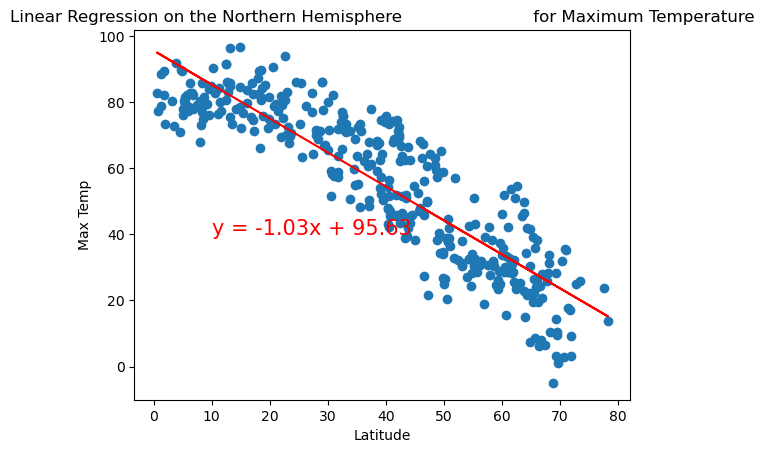

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

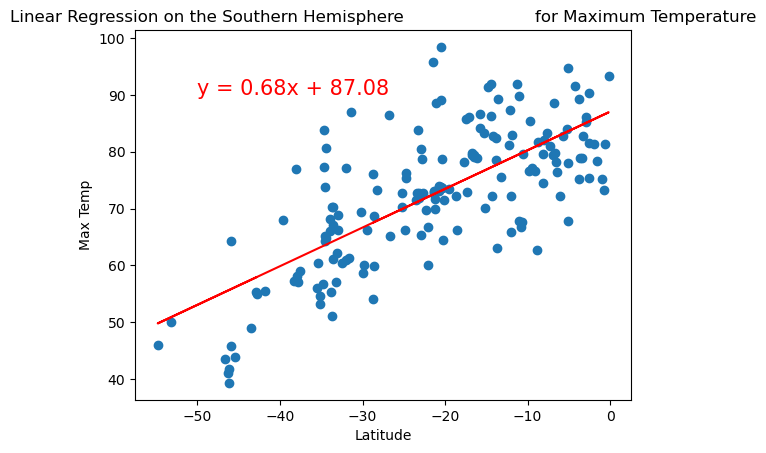

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

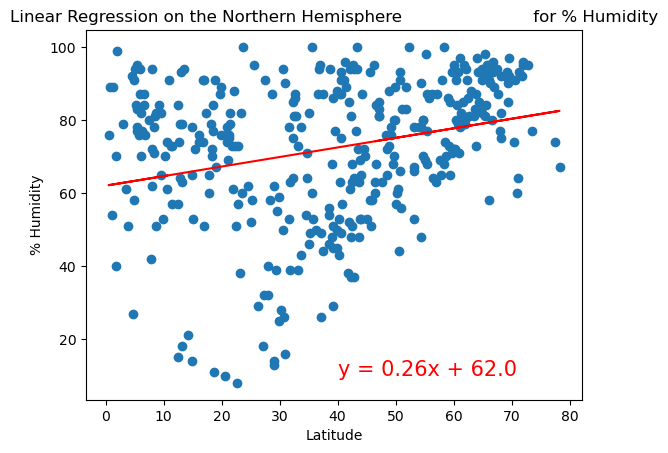

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

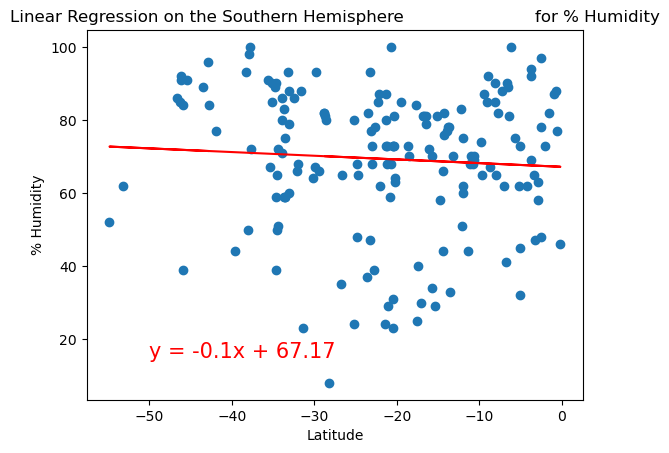

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

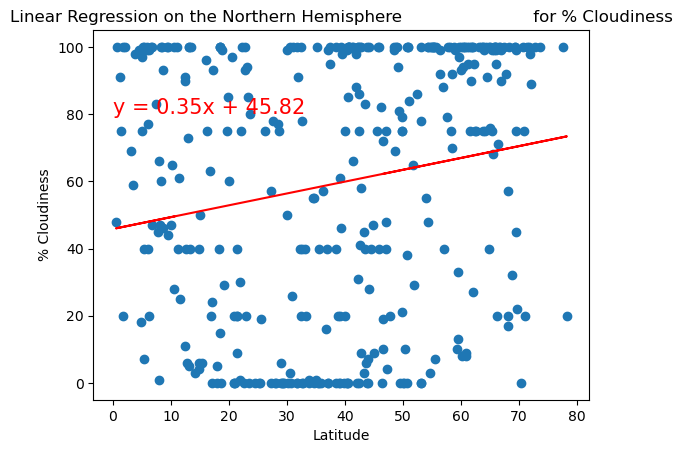

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,80))

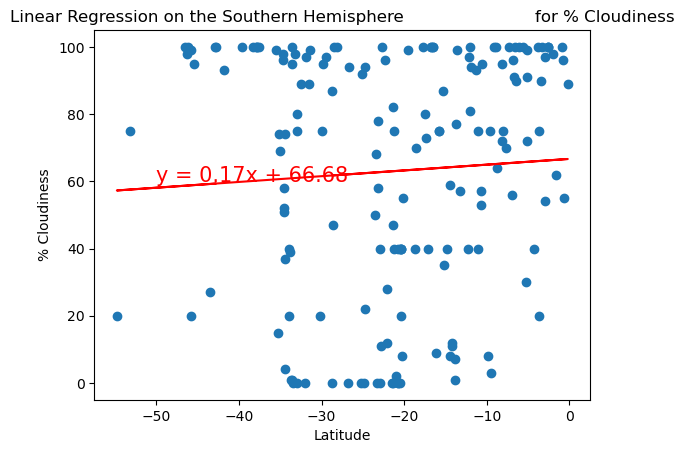

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

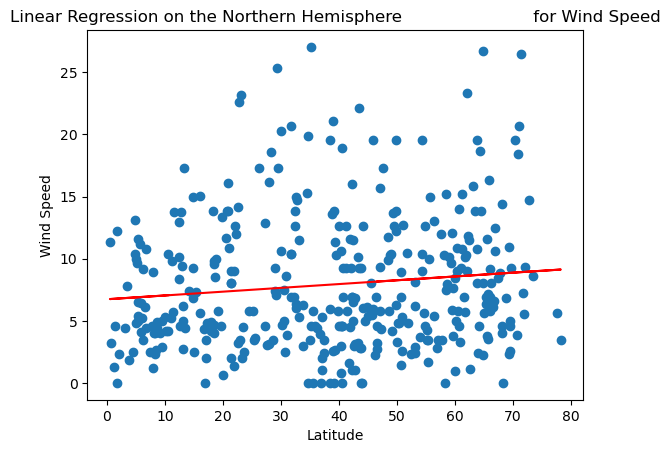

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

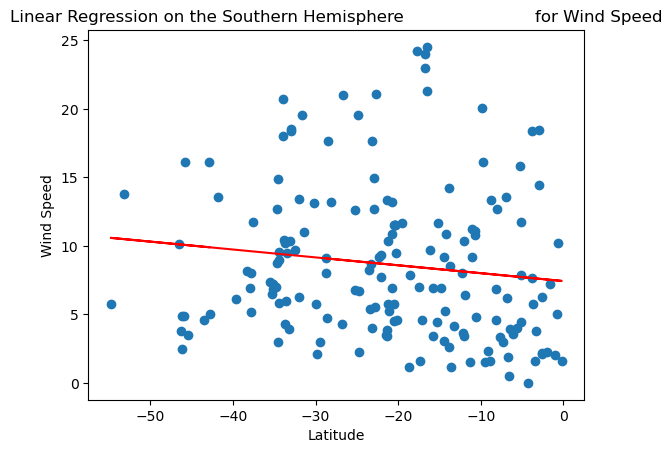

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))